Sebastian Yepes Acevedo

Cc:1007448816

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargamos el dataset
df = sns.load_dataset('penguins')

# Primera aproximación a los datos de forma general y su limpieza:

# 1)

In [ ]:
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [ ]:
df.species.unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [ ]:
df.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

 Podemos identificar que el dataset cuenta con tres especies diferentes de pingüinos siendo estas Adelie, Chinstrap y Gentoo.

Además, al extraer los encabezados de las columnas, vemos que las caracteristicas son su isla, la longitud de su pico en mm, la profundidad de su pico, la longitud de sus aletas, la masa corporal y finalmente su sexo.

# 2)

Queremos limpiar los valores vacíos en el dataset. Para ello identificaremos cuantos y en donde se encuentran los valores vacios.

In [ ]:
missing = df.isna().sum()
print(missing)

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64


Una vez vemos que la principal zona con datos vacios es la del sexo, llenamos los espacios vacios como una nueva variable llamada "desconocidos" y descartamos las lineas sin datos.

In [ ]:
dfL = df.dropna(subset=['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g'])
dfL.loc[:, 'sex'] = dfL['sex'].fillna("Unknown")
dfL.isna().sum()

,0
species,0
island,0
bill_length_mm,0
bill_depth_mm,0
flipper_length_mm,0
body_mass_g,0
sex,0


In [ ]:
dfL

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


Realizamos este proceso debido a que los datos son pocos y podemos permitirnos este tipo de tratamientos simples. En otros casos para un conjunto de datos mucho mayor, podría usarse las medias de los datos para rellenar estos espacios.

# 3)

Filtramos en el dataset la isla y las especies de pingüinos, para posteriormente realizar el conteo

In [ ]:
dfe = dfL[['island', 'species']]
dfe

,island,species
0,Torgersen,Adelie
1,Torgersen,Adelie
2,Torgersen,Adelie
4,Torgersen,Adelie
5,Torgersen,Adelie
...,...,...
338,Biscoe,Gentoo
340,Biscoe,Gentoo
341,Biscoe,Gentoo
342,Biscoe,Gentoo


In [ ]:
dfe.groupby(["island"]).count()

,species
island,
Biscoe,167
Dream,124
Torgersen,51


Al filtrar la información del dataframe desde la información sobre los datos en la columna isla, podemos obtener que la isla con mayor número de pingüinos es Biscoe.

Podría considerarse un desbalance a la cantidad de especies presentes en cada isla, sin embargo la isla Torgersen presentaría el mayor desbalance al tener sólo 52 pingüinos según el dataframe.

# 4)

In [ ]:
dfe.groupby(["species"]).count()

,island
species,
Adelie,151
Chinstrap,68
Gentoo,123


De la misma forma, miramos que la mayor cantidad de pingüinos pertenecen a la especie Adelie.

En este caso, es desbalance es muy similar al caso anterior, donde la especie Chinstrap cuenta con la menor cantidad de pingüinos.

# 5)

In [ ]:
dff = dfL[['species','bill_length_mm']]
dff.groupby(["species"]).mean()

,bill_length_mm
species,
Adelie,38.791391
Chinstrap,48.833824
Gentoo,47.504878


In [ ]:
dff.groupby(["species"]).std()

,bill_length_mm
species,
Adelie,2.663405
Chinstrap,3.339256
Gentoo,3.081857


# 6)

In [ ]:
dfL[['bill_length_mm','species']].max()

,0
bill_length_mm,59.6
species,Gentoo


Nos encontramos que el pingüno con el pico más largo, pertenece a la especie Gentoo, contando con un pico de 59.6 mm.

# 7) y 8)

In [ ]:
dfb = dfL[['species','body_mass_g']]

In [ ]:
dfb.groupby(['species']).mean()

,body_mass_g
species,
Adelie,3700.662252
Chinstrap,3733.088235
Gentoo,5076.016260


In [ ]:
dfb.groupby(['species']).std()

,body_mass_g
species,
Adelie,458.566126
Chinstrap,384.335081
Gentoo,504.116237


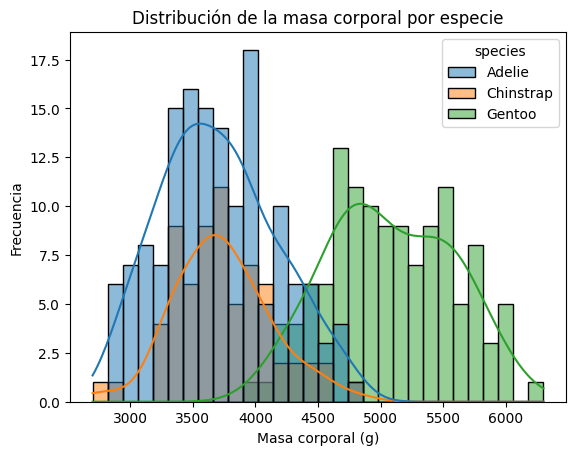

In [ ]:
sns.histplot(data=dfL, x="body_mass_g", hue="species", kde=True, bins=30)
plt.title("Distribución de la masa corporal por especie")
plt.xlabel("Masa corporal (g)")
plt.ylabel("Frecuencia")
plt.show()

# 9)

In [ ]:
dfL.groupby('sex')['body_mass_g'].agg(['mean', 'std'])

,mean,std
sex,,
Female,3862.272727,666.172050
Male,4545.684524,787.628884
Unknown,4005.555556,679.358357


# 10)

In [ ]:
dfL.groupby('species')['flipper_length_mm'].agg(['mean', 'std'])

,mean,std
species,,
Adelie,189.953642,6.539457
Chinstrap,195.823529,7.131894
Gentoo,217.186992,6.484976


# 11)

In [ ]:
dfL.groupby('species')['flipper_length_mm'].agg(['max', 'min'])

,max,min
species,,
Adelie,210.0,172.0
Chinstrap,212.0,178.0
Gentoo,231.0,203.0


# 12)

In [ ]:
dfL.groupby(['island','species'])['bill_length_mm'].agg(['mean','std','count'])


mean       std  count
island    species                              
Biscoe    Adelie     38.975000  2.480916     44
          Gentoo     47.504878  3.081857    123
Dream     Adelie     38.501786  2.465359     56
          Chinstrap  48.833824  3.339256     68
Torgersen Adelie     38.950980  3.025318     51

# 13)

In [ ]:
dfL.groupby(['island', 'species'])['bill_length_mm'].std()


island     species  
Biscoe     Adelie       2.480916
           Gentoo       3.081857
Dream      Adelie       2.465359
           Chinstrap    3.339256
Torgersen  Adelie       3.025318
Name: bill_length_mm, dtype: float64

# 14)

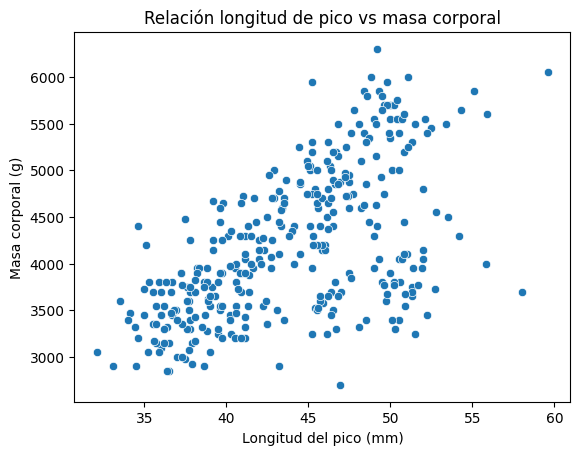

In [ ]:
sns.scatterplot(data = dfL, x = 'bill_length_mm', y = 'body_mass_g')
plt.title('Relación longitud de pico vs masa corporal')
plt.xlabel("Longitud del pico (mm)")
plt.ylabel("Masa corporal (g)")
plt.show()

Podemos ver una distribución que pareciera crecer, sin embargo es bastante complicado de notar tendencias y relaciones presentando los datos de esta manera.

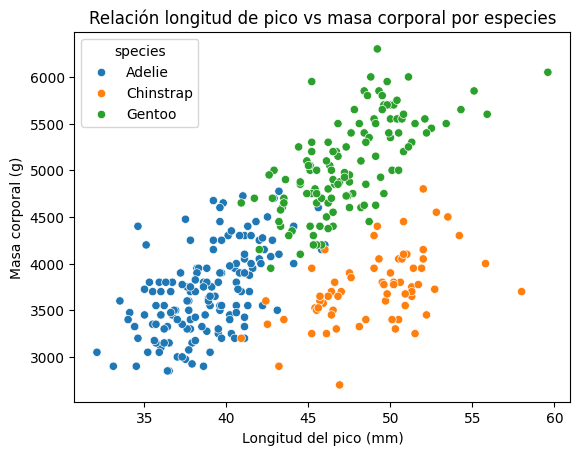

In [ ]:
sns.scatterplot(data = dfL, x = 'bill_length_mm', y = 'body_mass_g', hue = 'species')
plt.title('Relación longitud de pico vs masa corporal por especies')
plt.xlabel("Longitud del pico (mm)")
plt.ylabel("Masa corporal (g)")
plt.show()

Por otra parte, si vemos la distribución por especie, se puede notar mucho mejor lo que pareciera ser cierta relación entre ambas carácteristicas, donde mientras más largo el pico, mayor es la masa corporal del pingüino.

# 15)

In [ ]:
from scipy.stats import pearsonr
import numpy as np

In [ ]:
for species in dfL['species'].unique():
    subset = dfL[dfL['species'] == species]
    r, p_value = pearsonr(subset['bill_length_mm'], subset['body_mass_g'])
    print(f"{species}: r = {r:.3f}, p-value = {p_value:.3e}")

Adelie: r = 0.549, p-value = 2.955e-13
Chinstrap: r = 0.514, p-value = 7.480e-06
Gentoo: r = 0.669, p-value = 2.676e-17


Teniendo en cuneta que los coeficientes de correlación y el P valor obtenido, que la correlación entre la masa de los pingüinos y la longitud de su pico cuenta con una correlación significativa.

De igual forma, los coeficientes de correlación nos permiten ver que la correlacción entre ambas es fuerte debido a su cercanía al 1.

# 16)

     species      sex    mean   std  count
0     Adelie   Female  187.79  5.60     73
1     Adelie     Male  192.41  6.60     73
2     Adelie  Unknown  185.60  6.11      5
3  Chinstrap   Female  191.74  5.75     34
4  Chinstrap     Male  199.91  5.98     34
5     Gentoo   Female  212.71  3.90     58
6     Gentoo     Male  221.54  5.67     61
7     Gentoo  Unknown  215.75  1.26      4


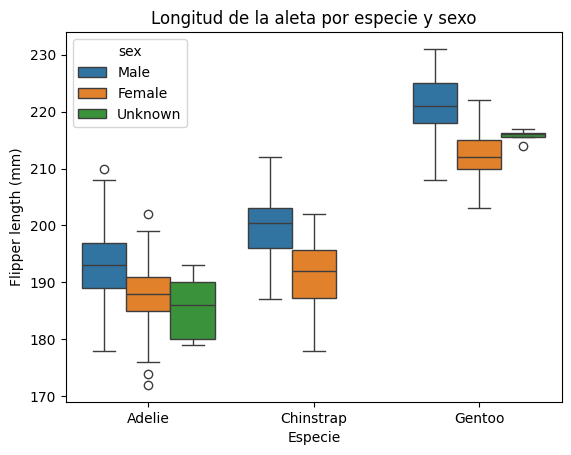

In [ ]:
flipper_stats = (
    dfL.groupby(['species', 'sex'])['flipper_length_mm']
    .agg(['mean', 'std', 'count'])
    .round(2)
    .reset_index()
)

print(flipper_stats)

# Visualización: boxplot por especie y sexo
sns.boxplot(data=dfL, x="species", y="flipper_length_mm", hue="sex")
plt.title("Longitud de la aleta por especie y sexo")
plt.ylabel("Flipper length (mm)")
plt.xlabel("Especie")
plt.show()

Podemos observar que según los datos obtenidos, los machos tienden a tener una aleta mucho más larga en comparación a las hembras.

# 17)

Definimos las siguientes hipótesis:

$H_0$:No existe correlación entre la longitud del pico y la masa corporal en la especie Gentoo

$H_1$:Sí existe correlación

In [ ]:
from scipy import stats

gentoo = dfL[dfL["species"] == "Gentoo"]

X = gentoo["bill_length_mm"].values
Y = gentoo["body_mass_g"].values
n = len(X)

r = np.corrcoef(X, Y)[0, 1]

t = (r * np.sqrt(n - 2)) / np.sqrt(1 - r**2)

intervalo = stats.t.interval(0.95, n - 2, loc=0, scale=1)

print(f"n = {n}")
print(f"Coef. de correlación r = {r:.3f}")
print(f"Estadístico t = {t:.3f}")
print(f"Intervalo: [{intervalo[0]:.3f}, {intervalo[1]:.3f}]")

if t < intervalo[0] or t > intervalo[1]:
    print('Se rechaza H0: la correlación NO es aleatoria.')
else:
    print('No se rechaza H0: la correlación podría ser aleatoria.')


n = 123
Coef. de correlación r = 0.669
Estadístico t = 9.905
Intervalo: [-1.980, 1.980]
Se rechaza H0: la correlación NO es aleatoria.


Tenemos así mediante la prueba de hipótesis, que en efecto, existe correlación entre la longitud del pico y el peso corporal de la especie Gentoo.